# 주제 : 우리나라의 행복지수는 몇 위? 아니, 행복지수가 도대체 뭔데?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 World Happiness Report up to 2020을 사용합니다.
    
    - 다음 6개의 csv 파일을 사용합니다.
    2015.csv
    2016.csv
    2017.csv
    2018.csv
    2019.csv
    2020.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Country: 국가
    Region: 국가의 지역
    Happiness Rank: 행복지수 순위
    Happiness Score: 행복지수 점수
    GDP per capita: 1인당 GDP
    Healthy Life Expectancy: 건강 기대수명
    Social support: 사회적 지원
    Freedom to make life choices: 삶에 대한 선택의 자유
    Generosity: 관용
    Corruption Perception: 부정부패
    Dystopia + Residual: 그 외

    
- 데이터 출처: https://www.kaggle.com/mathurinache/world-happiness-report

## 최종 목표
    - 전문가에 의해 작성된 데이터 분석해보기
    - 시간적으로 변하는 데이터의 Plot 방법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 행복지수 데이터에 대하여

### 전문가에 의해 작성된 데이터
- 전문가에 의해 통계처리가 완료된 데이터
- survey기관 (여론조사기관)등에서 모집단을 sampling통해 적절한 통계치를 구해 신뢰도 95퍼센트 이내에서 적적한 평균오차를 가진 데이터를 얻음

### 행복지수 점수의 구성에 대하여
- 0~10점으로 구성된 캔드릴 사다리에서 점수가 되어잇음
- dystopia + residual : 각 국가별로 2.0이라는 residual을 받고 6개 항목에 해당안되는 여러가지 요소를 dystopia 점수로 내어 합친것
- 이것들을 합치면 happiness score

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'samjinwang'
os.environ['KAGGLE_KEY'] = "275e30bb4ec266131f19681443d436b8"



### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!rm *.*
!kaggle datasets download -d mathurinache/world-happiness-report
!unzip '*.zip'


rm: cannot remove '*.*': No such file or directory
  0% 0.00/53.9k [00:00<?, ?B/s]
100% 53.9k/53.9k [00:00<00:00, 22.4MB/s]
Archive:  world-happiness-report.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = dict()
df['2015'] = pd.read_csv('2015.csv')
df['2016'] = pd.read_csv('2016.csv')
df['2017'] = pd.read_csv('2017.csv')
df['2018'] = pd.read_csv('2018.csv')
df['2019'] = pd.read_csv('2019.csv')
df['2020'] = pd.read_csv('2020.csv')

In [6]:
df['2020'].head()

Country name  ... Dystopia + residual
0      Finland  ...            2.762835
1      Denmark  ...            2.432741
2  Switzerland  ...            2.350267
3      Iceland  ...            2.460688
4       Norway  ...            2.168266

[5 rows x 20 columns]

## Step 2. 데이터프레임 구성하기


### 문제 4. 년도별 데이터 표준화하기


In [7]:
for key in df:
  print(key, df[key].columns) # 각 데이터프레임의 컬럼 확인

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

In [8]:
# 각 년도별로 다른 정보를 가진 데이터 프레임의 Column을 동일하게 표준화하기
cols = ['country', 'score', 'economy', 'family', 'health', 'freedom', 'generosity', 'trust', 'residual']

In [9]:
df['2015'].drop(['Region', 'Happiness Rank', 'Standard Error'], axis=1, inplace=True) # generosity, trust 순서 반대
df['2016'].drop(['Region', 'Happiness Rank', 'Lower Confidence Interval',
                 'Upper Confidence Interval'], axis=1, inplace=True) # generosity, trust 순서 반대
df['2017'].drop(['Happiness.Rank', 'Whisker.high', 'Whisker.low'], axis=1, inplace=True) 
df['2018'].drop(['Overall rank'], axis=1, inplace=True) # residual 없음
df['2019'].drop(['Overall rank'], axis=1, inplace=True) # residual 없음
df['2020'].drop(['Regional indicator', 'Standard error of ladder score', 
                 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
                 'Social support', 'Healthy life expectancy',
                 'Freedom to make life choices', 'Generosity',
                 'Perceptions of corruption', 'Ladder score in Dystopia'], axis=1, inplace=True)

In [10]:
df['2019'].columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [11]:
#residual 추가
df['2018']['residual'] = df['2018']['Score'] - df['2018'][['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis = 1) #axis =1 를 넣어줌으로 각 axis별로 합을 구할수 있게됨

df['2019']['residual'] = df['2018']['Score'] - df['2018'][['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis = 1)

In [12]:
df['2016'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [13]:
df['2015'] = df['2015'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual']]
df['2016'] = df['2016'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual']]

In [14]:
for key in df:
  print(key, df[key].columns) # 각 데이터프레임의 컬럼 확인

2015 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'residual'],
      dtype='object')
2019 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life 

In [15]:
for col_name in df:
  df[col_name].columns = cols
# 각 컬럼을 통일된 이름으로 만들어줌

In [16]:
df['2016']

country  score  economy  ...  generosity    trust  residual
0        Denmark  7.526  1.44178  ...     0.36171  0.44453   2.73939
1    Switzerland  7.509  1.52733  ...     0.28083  0.41203   2.69463
2        Iceland  7.501  1.42666  ...     0.47678  0.14975   2.83137
3         Norway  7.498  1.57744  ...     0.37895  0.35776   2.66465
4        Finland  7.413  1.40598  ...     0.25492  0.41004   2.82596
..           ...    ...      ...  ...         ...      ...       ...
152        Benin  3.484  0.39499  ...     0.20180  0.06681   2.10812
153  Afghanistan  3.360  0.38227  ...     0.31268  0.07112   2.14558
154         Togo  3.303  0.28123  ...     0.17517  0.11587   2.13540
155        Syria  3.069  0.74719  ...     0.48397  0.17233   0.81789
156      Burundi  2.905  0.06831  ...     0.20290  0.09419   2.10404

[157 rows x 9 columns]

### 문제 5. 하나의 데이터프레임으로 합치기


In [17]:
# 아래 셀과 동일한 데이터프레임으로 결합하기
df_all = pd.concat(df, axis = 0)
df_all.index.names = ['year','rank'] #각 연도랑 각각의 rank로 만들어줌




In [18]:
df_all

country   score  ...     trust  residual
year rank                                    ...                    
2015 0                  Switzerland  7.5870  ...  0.419780  2.517380
     1                      Iceland  7.5610  ...  0.141450  2.702010
     2                      Denmark  7.5270  ...  0.483570  2.492040
     3                       Norway  7.5220  ...  0.365030  2.465310
     4                       Canada  7.4270  ...  0.329570  2.451760
...                             ...     ...  ...       ...       ...
2020 148   Central African Republic  3.4759  ...  0.028265  2.860198
     149                     Rwanda  3.3123  ...  0.485542  0.548445
     150                   Zimbabwe  3.2992  ...  0.080929  0.841031
     151                South Sudan  2.8166  ...  0.111157  1.378751
     152                Afghanistan  2.5669  ...  0.001226  1.507236

[935 rows x 9 columns]

In [19]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

### 문제 6. 원하는 형태로 데이터프레임 정리하기

In [20]:
# 아래 셀과 동일한 데이터프레임으로 변형하기
df_all.reset_index(inplace = True)

In [21]:
df_all['rank'] += 1

In [22]:
df_all

year  rank                   country  ...  generosity     trust  residual
0    2015     1               Switzerland  ...    0.296780  0.419780  2.517380
1    2015     2                   Iceland  ...    0.436300  0.141450  2.702010
2    2015     3                   Denmark  ...    0.341390  0.483570  2.492040
3    2015     4                    Norway  ...    0.346990  0.365030  2.465310
4    2015     5                    Canada  ...    0.458110  0.329570  2.451760
..    ...   ...                       ...  ...         ...       ...       ...
930  2020   149  Central African Republic  ...    0.253513  0.028265  2.860198
931  2020   150                    Rwanda  ...    0.235705  0.485542  0.548445
932  2020   151                  Zimbabwe  ...    0.151349  0.080929  0.841031
933  2020   152               South Sudan  ...    0.209935  0.111157  1.378751
934  2020   153               Afghanistan  ...    0.135235  0.001226  1.507236

[935 rows x 11 columns]

In [23]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

### 문제 7. Pivot을 이용하여 데이터프레임 재구성하기

In [24]:
# 아래 셀과 동일한 데이터프레임 구성하기
# Hint) DataFrame의 pivot() 메소드 활용
rank_table = df_all.pivot(index = 'country',columns = ['year'],values ='rank') #country 기준 pivot이라 abc 순이다
# 모든 국가가 rank가 되어잇는게 아니라 nan 값도 있다
rank_table.sort_values('2020', inplace = True)





In [25]:
rank_table.head(10)

year         2015  2016  2017  2018  2019  2020
country                                        
Finland       6.0   5.0   5.0   1.0   1.0   1.0
Denmark       3.0   1.0   2.0   3.0   2.0   2.0
Switzerland   1.0   2.0   4.0   5.0   6.0   3.0
Iceland       2.0   3.0   3.0   4.0   4.0   4.0
Norway        4.0   4.0   1.0   2.0   3.0   5.0
Netherlands   7.0   7.0   6.0   6.0   5.0   6.0
Sweden        8.0  10.0   9.0   9.0   7.0   7.0
New Zealand   9.0   8.0   8.0   8.0   8.0   8.0
Austria      13.0  12.0  13.0  12.0  10.0   9.0
Luxembourg   17.0  20.0  18.0  17.0  14.0  10.0

In [26]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

## Step 3. 데이터 시각화 수행하기

### 문제 8. 년도별 순위 변화 시각화하기

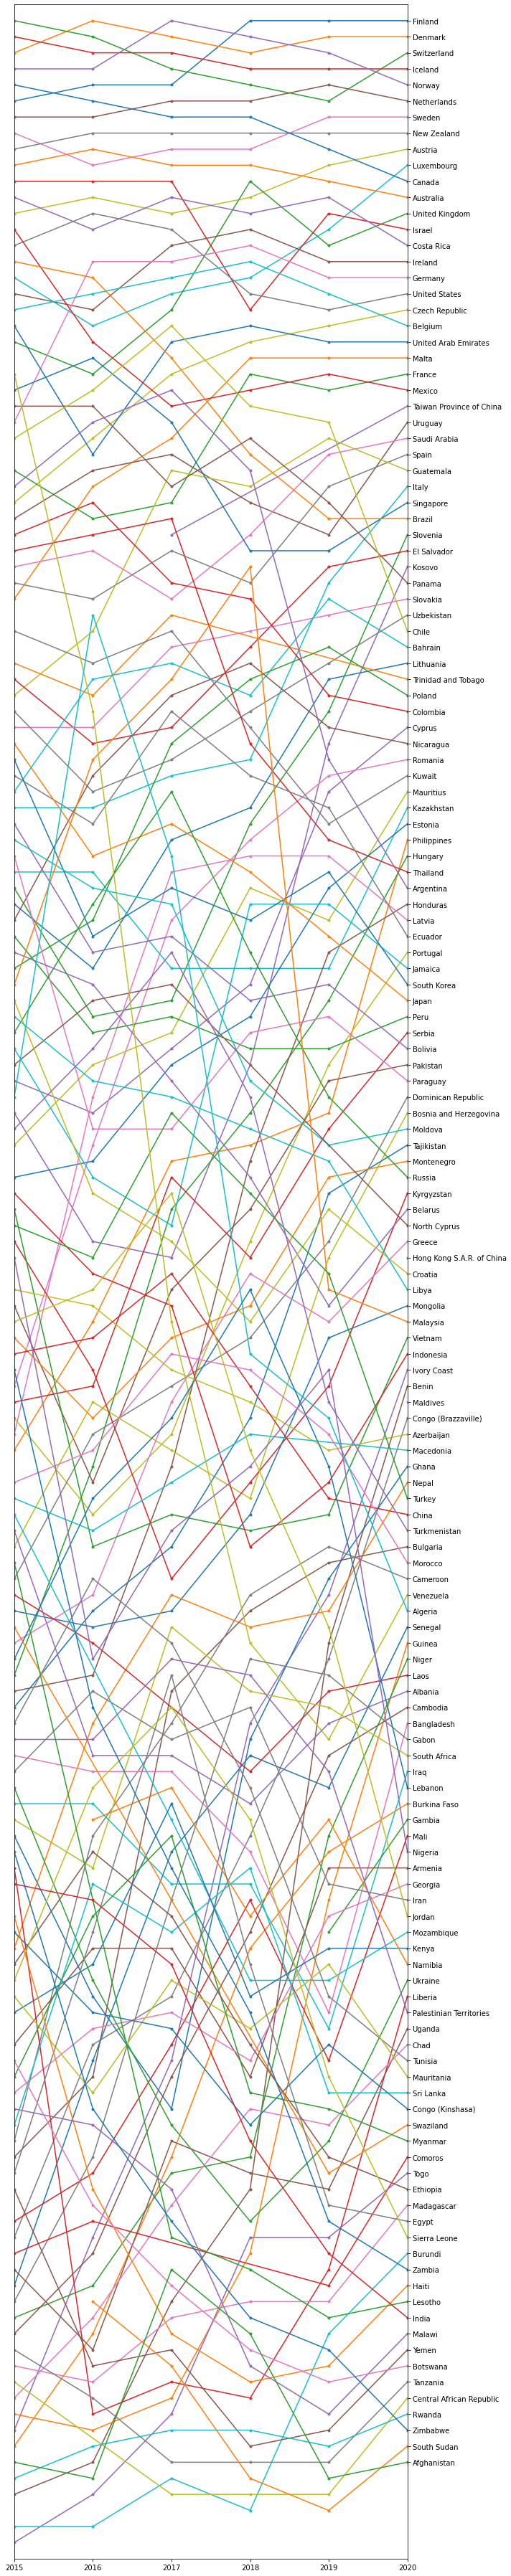

In [33]:
# 아래 셀과 동일하게 년도별 순위 변화를 시각화하기
# Hint) plt.plot을 이용하고, 필요한 경우 데이터프레임을 변형하면서 그리시오.

fig = plt.figure(figsize = (10,50))
rank2020 = rank_table['2020'].dropna()
for c in rank_table['2020'].dropna().index: #nan 값을뺀 나머지 국가들의 순위를 하나씩 돌려줌
  t = rank_table.loc[c].dropna() # 각국가별로 연도별 랭크를 보여주게됨 #중간에 등수가 빠진 나라는 빼고 해서 그래프가 끊어지는걸 방지
  plt.plot(t.index, t, '.-') #x축:연도 , y축: 연도별 랭킹, 선중간마다 점
  

plt.xlim(['2015','2020']) #15년도 부터 20년도를 딱 끝에맞춤
plt.ylim([0, rank_table.max().max()+1]) #맥스하나면 #연도별 최하위권, 두개면 그중 최고 하위권, +1 은 그냥 위아래 공간 확보
plt.yticks(rank2020, rank2020.index) #각 나라의 랭크를 나라이름으로 바꿔줌
ax = plt.gca()
ax.invert_yaxis() # y축 순서를 거꾸로 뒤집어줌
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right() #y축을 우측으로 옮겨줌
plt.tight_layout()
plt.show()



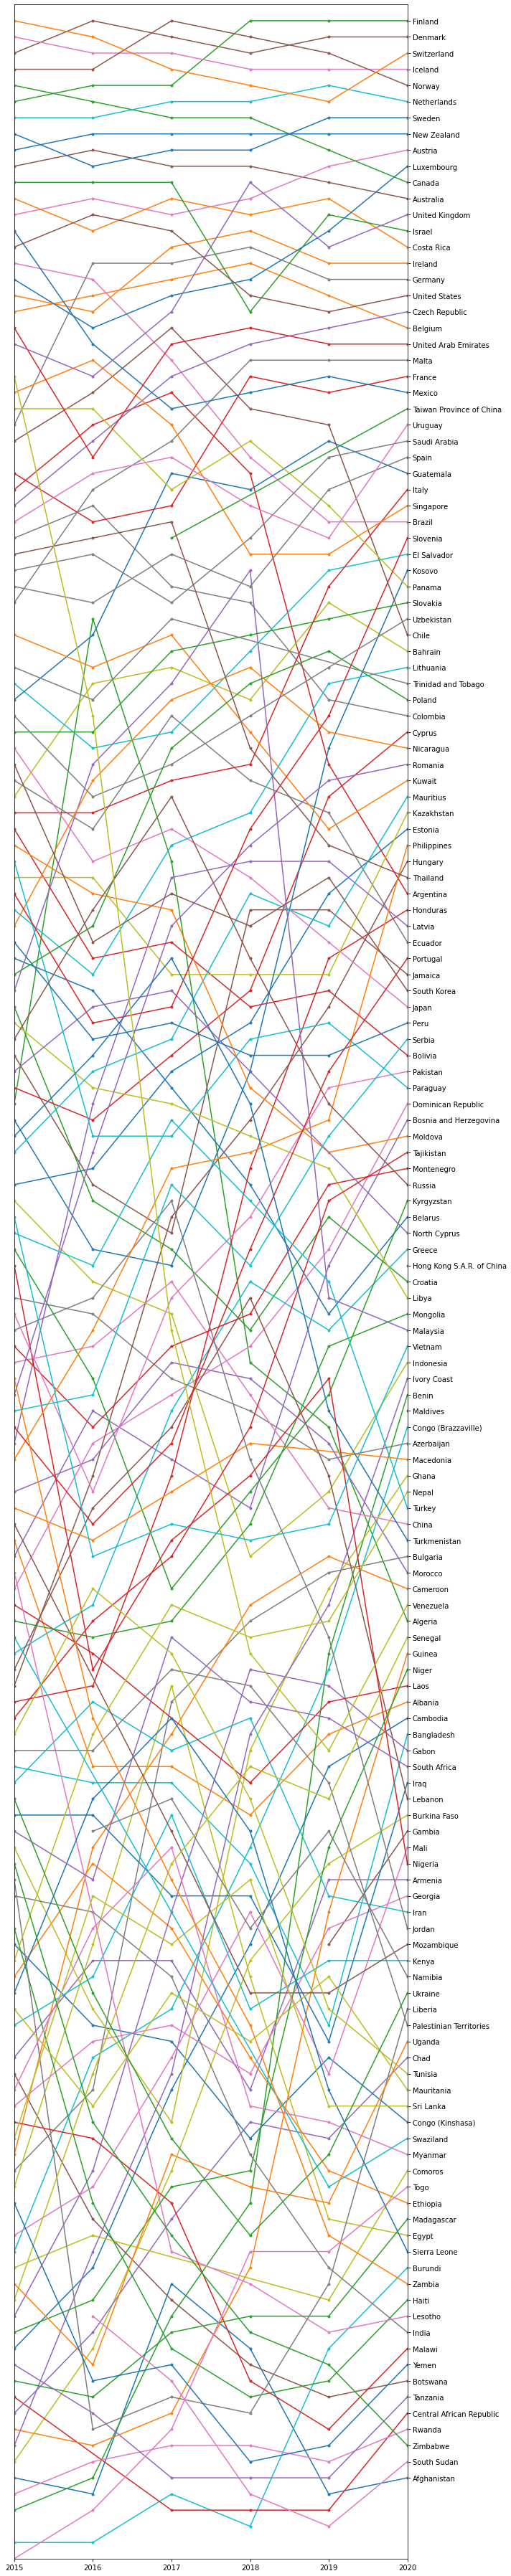

In [ ]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

### 문제 9. 분야별로 나누어 점수 시각화하기

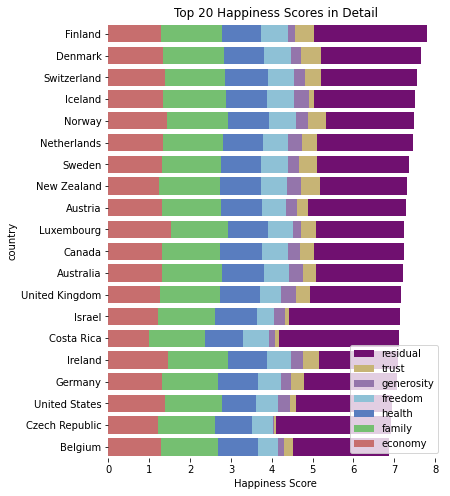

In [44]:
# sns.barplot()을 이용하여 아래 셀과 동일하게 시각화하기
# Hint) 필요에 따라 데이터프레임을 수정하여 사용하시오. 적절한 수정을 위해 누적합(pd.cumsum())을 활용하시오.

fig = plt.figure(figsize = (6,8))
data = df_all[df_all['year']== '2020']
data = data.loc[data.index[:20]] #2020년 상위20등까지 가져오기

d = data[data.columns[4:]].cumsum(axis = 1) #같은 나라별로 수치끼리 누적그래프 바 만들기
d = d[d.columns[::-1]]  #residual부터(누적합이 가장많이 쌓인곳부터) 그리기
d['country'] = data['country']

sns.set_color_codes('muted') #톤 다운된 색깔로 변경
colors = ['r', 'g','b','c','m','y','purple'][::-1] #각 요소별로 색깔 배정
for idx, c in enumerate(d.columns[:-1]):
  sns.barplot(x=c, y = 'country', data = d, label = c, color = colors[idx])

plt.legend(loc = 'lower right')
plt.title('Top 20 Happiness Scores in Detail')
plt.xlabel('Happiness Score')
sns.despine(left=True, bottom= True) #프레임 제거

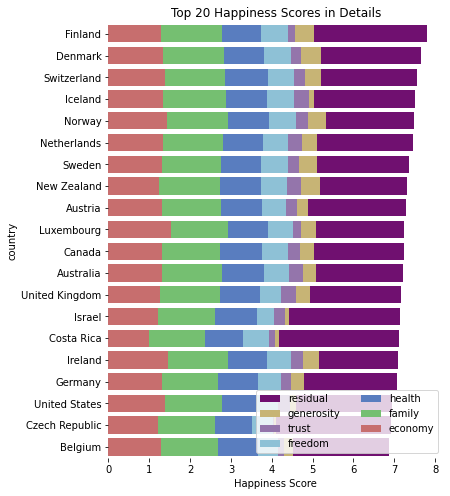

In [ ]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

### 문제 10. Column간의 상관성 시각화하기

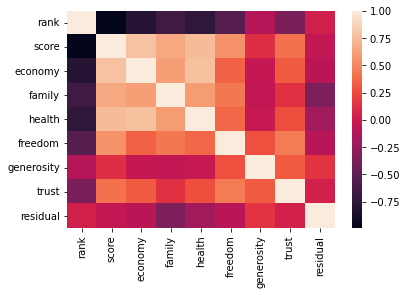

In [45]:
# 상관성 Heatmap, Pairplot 등으로 상관성을 시각화하기
sns.heatmap(df_all.corr('rank',axis = 1).corr(), annot = True, cmap = 'YlOrRd')

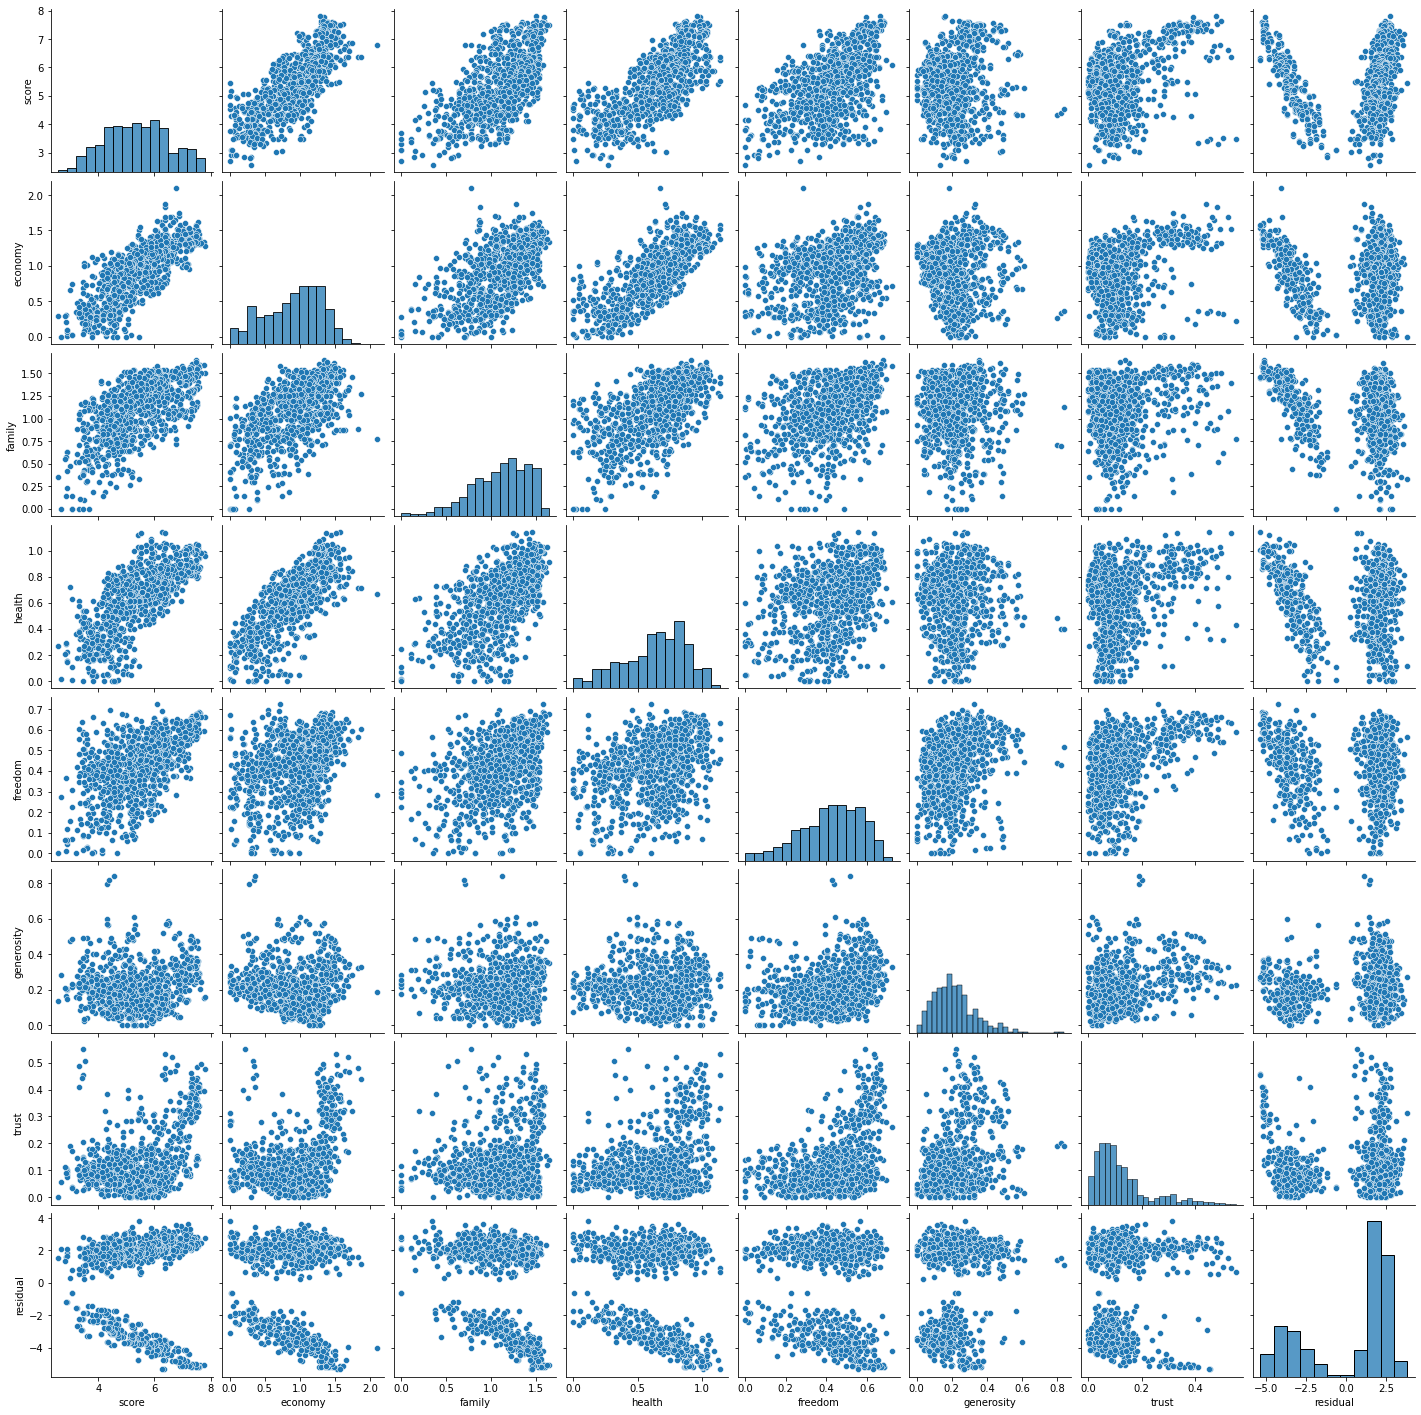

In [47]:
sns.pairplot(df_all.drop('rank',axis = 1))

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. 모델의 입력과 출력 정의하기

In [ ]:
# 학습할 모델의 입출력을 정의하시오. Column의 의미를 고려하여 선정하시오.
col_input_list = 
col_out = 

### 문제 12. 학습데이터와 테스트데이터 분리하기


In [ ]:
# 2015년 ~ 2019년도 데이터를 학습 데이터로, 2020년도 데이터를 테스트 데이터로 분리하기
df_train = 
df_test = 

X_train = df_train[col_input_list]
y_train = df_train[col_out]
X_test = df_test[col_input_list]
y_test = df_test[col_out]

### 문제 13. StandardScaler를 이용해 학습 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 학습 데이터를 표준화하기
scaler = 

## Step 5. Regression 모델 학습하기

### 문제 14. Linear Regression 모델 학습하기

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression 모델 생성/학습
model_lr = 




### 문제 15. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = 





### 문제 16. XGBoost Regression 모델 학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = 




### 문제 17. 모델 학습 결과 평가하기

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = 





## Step 6. 모델 학습 결과 심화 분석하기


### 문제 18. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기






### 문제 19. LinearRegression 모델의 Coefficient 시각화하기


In [ ]:
# model_lr.coef_ 시각화하기






### 문제 20. XGBoost 모델의 Feature Importance 시각화하기


In [ ]:
# model_xgb.feature_importance_ 시각화하기




